<a href="https://colab.research.google.com/github/imadegunawinangun/NLP-Desi---Deteksi-Emosi/blob/main/Desi_Detektor_Emosi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
#drive.mount('/content/drive')

In [2]:
!git clone https://github.com/imadegunawinangun/NLP-Desi---Deteksi-Emosi

Cloning into 'NLP-Desi---Deteksi-Emosi'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 35 (delta 17), reused 14 (delta 3), pack-reused 0
Unpacking objects: 100% (35/35), done.


In [1]:
!ls NLP-Desi---Deteksi-Emosi

ls: cannot access 'NLP-Desi---Deteksi-Emosi': No such file or directory


In [3]:
import pandas as pd
import os
import numpy as np


In [4]:
read_file = pd.read_csv (r'NLP-Desi---Deteksi-Emosi/data.txt',error_bad_lines=False,sep=';')
read_file.to_csv ('NLP-Desi---Deteksi-Emosi/data.csv', index=None)

b'Skipping line 144: expected 2 fields, saw 3\nSkipping line 163: expected 2 fields, saw 3\nSkipping line 460: expected 2 fields, saw 3\nSkipping line 496: expected 2 fields, saw 3\nSkipping line 541: expected 2 fields, saw 3\nSkipping line 557: expected 2 fields, saw 3\nSkipping line 697: expected 2 fields, saw 3\nSkipping line 882: expected 2 fields, saw 3\nSkipping line 890: expected 2 fields, saw 3\nSkipping line 908: expected 2 fields, saw 3\nSkipping line 911: expected 2 fields, saw 3\nSkipping line 1037: expected 2 fields, saw 3\nSkipping line 1070: expected 2 fields, saw 3\nSkipping line 1173: expected 2 fields, saw 3\nSkipping line 1193: expected 2 fields, saw 3\nSkipping line 1197: expected 2 fields, saw 3\nSkipping line 1317: expected 2 fields, saw 3\nSkipping line 1698: expected 2 fields, saw 3\nSkipping line 1716: expected 2 fields, saw 3\nSkipping line 1874: expected 2 fields, saw 3\nSkipping line 2188: expected 2 fields, saw 3\nSkipping line 2228: expected 2 fields, saw 

In [5]:
datadir = 'NLP-Desi---Deteksi-Emosi//'
columns = ['kalimat', 'emosi']
data = pd.read_csv(os.path.join(datadir, 'data.csv'), names = columns)
data['emosi']=data['emosi'].astype("category")
pd.set_option('display.max_colwidth', -1)
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """


,kalimat,emosi
0,saya tidak merasa terhina,kesedihan
1,saya bisa berubah dari merasa sangat putus asa menjadi sangat berharap hanya dari berada di sekitar seseorang yang peduli dan terjaga,kesedihan
2,saya mengambil waktu sebentar untuk memposting saya merasa serakah salah,kemarahan
3,saya pernah merasa nostalgia tentang perapian saya akan tahu bahwa itu masih di properti,cinta
4,saya merasa kesal,kemarahan
...,...,...
15853,saya hanya memiliki waktu yang sangat singkat di beanbag dan saya berkata kepada anna bahwa saya merasa seperti saya telah dipukuli,kesedihan
15854,saya sekarang berbalik dan saya merasa menyedihkan bahwa saya masih menunggu meja dan subbing dengan gelar mengajar,kesedihan
15855,saya merasa kuat dan baik secara keseluruhan,kegembiraan
15856,Saya merasa ini adalah komentar yang kasar dan saya senang bahwa t,kemarahan


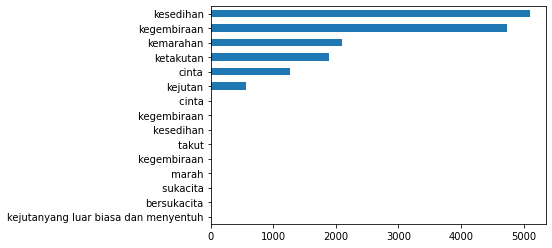

In [6]:
data.emosi.value_counts().sort_values().plot(kind = 'barh')

In [ ]:
data['emosi']

0        kesedihan  
1        kesedihan  
2        kemarahan  
3        cinta      
4        kemarahan  
           ...      
15853    kesedihan  
15854    kesedihan  
15855    kegembiraan
15856    kemarahan  
15857    kesedihan  
Name: emosi, Length: 15858, dtype: category
Categories (15, object): [' kegembiraan', ' ​​cinta', ' ​​kegembiraan', ' ​​kesedihan', ...,
                          'kejutanyang luar biasa dan menyentuh', 'kemarahan', 'kesedihan', 'ketakutan']

In [ ]:
category = pd.get_dummies(data.emosi)
df_baru = pd.concat([data, category], axis=1)
df_baru = df_baru.drop(columns='emosi')
df_baru

,kalimat,kegembiraan,​​cinta,​​kegembiraan,​​kesedihan,​​marah,​​sukacita,​​takut,bersukacita,cinta,kegembiraan,kejutan,kejutanyang luar biasa dan menyentuh,kemarahan,kesedihan,ketakutan
0,saya tidak merasa terhina,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,saya bisa berubah dari merasa sangat putus asa menjadi sangat berharap hanya dari berada di sekitar seseorang yang peduli dan terjaga,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,saya mengambil waktu sebentar untuk memposting saya merasa serakah salah,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,saya pernah merasa nostalgia tentang perapian saya akan tahu bahwa itu masih di properti,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,saya merasa kesal,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15853,saya hanya memiliki waktu yang sangat singkat di beanbag dan saya berkata kepada anna bahwa saya merasa seperti saya telah dipukuli,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
15854,saya sekarang berbalik dan saya merasa menyedihkan bahwa saya masih menunggu meja dan subbing dengan gelar mengajar,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
15855,saya merasa kuat dan baik secara keseluruhan,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
15856,Saya merasa ini adalah komentar yang kasar dan saya senang bahwa t,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
def load_img_steering(df):
  teks = []
  label = []
  for i in range(len(data)):
    indexed_data = df.iloc[i]
    teks.append((indexed_data[0]))
    label.append(indexed_data[[1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15]] )
    # left image append
    #image_path.append(os.path.join(datadir,left.strip()))
    #steering.append(float(indexed_data[3])+0.15)
    # right image append
    #image_path.append(os.path.join(datadir,right.strip()))
    #steering.append(float(indexed_data[3])-0.15)
  data_teks = np.asarray(teks)
  label_teks = np.asarray(label)
  return   data_teks , label_teks
 
data_teks, label_teks = load_img_steering(df_baru)


In [ ]:
data_teks

array(['saya tidak merasa terhina',
       'saya bisa berubah dari merasa sangat putus asa menjadi sangat berharap hanya dari berada di sekitar seseorang yang peduli dan terjaga',
       'saya mengambil waktu sebentar untuk memposting saya merasa serakah salah',
       ..., 'saya merasa kuat dan baik secara keseluruhan',
       'Saya merasa ini adalah komentar yang kasar dan saya senang bahwa t',
       'saya tahu banyak tapi saya merasa sangat bodoh karena saya tidak bisa menggambarkannya'],
      dtype='<U410')

In [ ]:
label_teks = np.array(label_teks, dtype=np.int32)
label_teks

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=int32)

In [ ]:
from sklearn.model_selection import train_test_split

kalimat_latih, kalimat_test, y_latih, y_test = train_test_split(data_teks, label_teks, test_size=0.2)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
num_words = 10000
tokenizer = Tokenizer(num_words, oov_token='*')
tokenizer.fit_on_texts(kalimat_latih) 
tokenizer.fit_on_texts(kalimat_test)
 
x_train_tokens = tokenizer.texts_to_sequences(kalimat_latih)
x_valid_tokens = tokenizer.texts_to_sequences(kalimat_test)

x_train_padded = pad_sequences(x_train_tokens) 
x_valid_padded = pad_sequences(x_valid_tokens)


In [ ]:
num_tokens = [len(tokens) for tokens in x_train_tokens + x_valid_tokens]
num_tokens = np.array(num_tokens)

In [ ]:
np.mean(num_tokens)

17.55946525413041

In [ ]:
np.max(num_tokens)

67

In [ ]:
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

37

In [ ]:
np.sum(num_tokens < max_tokens) / len(num_tokens)

0.9445075040988775

In [ ]:
print(kalimat_latih[0])
print(np.array(x_train_tokens[0]))
print(np.array(x_train_padded[0]))
print(np.array(tokenizer.sequences_to_texts(x_train_padded)[0]))

saya tidak membaca tradisi karena saya sangat menyukainya ketika orang asing membuka pintu saya, saya tidak merasa tersinggung atau seperti dia mencoba mengirim pesan kepada saya dan seluruh dunia bahwa saya tidak dapat membukanya sendiri
[   2    6  183 3074   15    2    9  539   27   19  918  801  761    2
    2    6    3  299   31   13   29  103 1132  967  110    2    4  353
  167   14    2    6   52 6183   55]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    2    6  183 3074   15    2    9  539   27   19
  918  801  761    2    2    6    3  299   31   13   29  103 1132  967
  110    2    4  353  167   14    2    6   52 6183   55]
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * saya tidak membaca tradisi karena saya sangat menyukainya ketika orang asing membuka pintu saya saya tidak merasa tersinggung atau seperti dia mencoba mengirim pesan kepada saya

In [ ]:
pip install -q -U keras-tuner


     |████████████████████████████████| 102kB 4.5MB/s 


In [ ]:
import kerastuner.tuners as kt


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  """Entry point for launching an IPython kernel.


In [ ]:
import tensorflow as tf

def model_rnn1(hp):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Embedding(num_words, hp.Int("Output Embed",min_value= 32, max_value = 128, step= 32), input_length=max_tokens,name='layer_embedding'))
  model.add(tf.keras.layers.LSTM(hp.Int("LSTM",min_value= 32, max_value = 128, step= 32)))

  for i in range(hp.Int("Dense Layers", min_value=1, max_value=2)):
      model.add(tf.keras.layers.Dense(hp.Int(f"Dense_{i+1}_layer", min_value= 32, max_value = 128, step= 32), 
                                   activation='relu'))

  model.add(tf.keras.layers.Dense(15, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(hp.Choice(f"learning_rate", [ 5e-4])),metrics=['accuracy'])
  return model
def model_rnn():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Embedding(num_words, 128, input_length=max_tokens,name='layer_embedding'))
  model.add(tf.keras.layers.LSTM(128))
  model.add(tf.keras.layers.Dense(512, activation='relu'))
  model.add(tf.keras.layers.Dense(256, activation='relu'))


  model.add(tf.keras.layers.Dense(15, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-4),metrics=['accuracy'])
  return model


In [ ]:
class MyTuner(kt.RandomSearch):
  def run_trial(self, trial, *args, **kwargs):
    # You can add additional HyperParameters for preprocessing and custom training loops
    # via overriding `run_trial`

    super(MyTuner, self).run_trial(trial, *args, **kwargs)

# Uses same arguments as the BayesianOptimization Tuner.
tuner = MyTuner(model_rnn1,
                objective='val_accuracy',
                max_trials=1000,)
# Don't pass epochs or batch_size here, let the Tuner tune them.

tuner.search(
    x_train_padded, y_latih,
        validation_split=0.2,
            epochs=50,
            callbacks=[
              tf.keras.callbacks.EarlyStopping(
              monitor='val_accuracy',
              patience=5,
              )
              ]
             )

Trial 17 Complete [00h 03m 15s]
val_accuracy: 0.6402679085731506

Best val_accuracy So Far: 0.7115839123725891
Total elapsed time: 01h 20m 40s

Search: Running Trial #18

Hyperparameter    |Value             |Best Value So Far 
Output Embed      |96                |96                
LSTM              |64                |128               
Dense Layers      |2                 |1                 
Dense_1_layer     |96                |128               
learning_rate     |0.0005            |0.0005            
Dense_2_layer     |96                |64                

Epoch 1/50
318/318 [==============================] - 21s 60ms/step - loss: 1.6788 - accuracy: 0.3145 - val_loss: 1.5676 - val_accuracy: 0.3247
Epoch 2/50
318/318 [==============================] - 19s 59ms/step - loss: 1.2939 - accuracy: 0.4929 - val_loss: 1.1290 - val_accuracy: 0.5682
Epoch 3/50
318/318 [==============================] - 19s 59ms/step - loss: 0.7698 - accuracy: 0.7177 - val_loss: 0.9487 - val_accuracy: 0.66

In [ ]:
model = model_rnn()
num_epochs = 30
history = model.fit(x_train_padded, y_latih, epochs=num_epochs, 
                    validation_split=0.2)